In [2]:
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_train = pd.read_csv("train.csv")#loading train data
df_test = pd.read_csv("test.csv")#loading test data

print(df_train.head())
print(df_train.info())
print(df_train.isnull().sum())
#these got used to see and get to know data better

   StudentID  Age  Gender         Ethnicity ParentalEducation  \
0       3321   17       1         Caucasian       High School   
1       1160   18       0         Caucasian       High School   
2       2644   16       0             Other      Some College   
3       2321   18       0             Asian       High School   
4       2419   15       1  African American          Bachelor   

   StudyTimeWeekly  Absences  Tutoring ParentalSupport  Extracurricular  \
0         9.906353        25         0            High                1   
1         4.681156        20         0            High                0   
2         6.845312        13         0             NaN                0   
3        19.885760         2         0            High                1   
4        14.806261        20         0       Very High                0   

   Sports  Music  Volunteering       GPA  
0       1      0             0  1.082390  
1       0      0             1  1.189549  
2       0      1             

- Preprocessing Data
  - eliminating or replacement of missing data
  - converting categorial features to numercial features
  - normalizing numercial features
  

In [4]:
#all the features that had null value had object type so they got replaced by most repetative value
df_train["ParentalEducation"]=df_train["ParentalEducation"].fillna(df_train["ParentalEducation"].mode()[0])
df_test["ParentalEducation"]=df_test["ParentalEducation"].fillna(df_test["ParentalEducation"].mode()[0])
df_train["ParentalSupport"]=df_train["ParentalSupport"].fillna(df_train["ParentalSupport"].mode()[0])
df_test["ParentalSupport"]=df_test["ParentalSupport"].fillna(df_test["ParentalSupport"].mode()[0])

In [6]:
#converting categorial features to numercial features
#those ones that had object type got converted
label_encoders = {}
categorical_features = ["Ethnicity", "ParentalEducation", "ParentalSupport"]
for col in categorical_features:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    label_encoders[col] = le

In [7]:
#getting the nd_array of x and y component of data
x_train = df_train.drop(columns=['GPA']).values
y_train = df_train['GPA'].values
x_test = df_test.drop(columns=['GPA']).values
y_test = df_test['GPA'].values

- Splitting train Data into Train and Val Sets
- Normalizing X Component of Data

In [8]:
#splitting
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [10]:
#normalizing
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_train)
normalizer.adapt(x_test)
normalizer.adapt(x_val)
x_train = normalizer(x_train)
x_test = normalizer(x_test)
x_val=normalizer(x_val)

- Defining Neural Network

In [11]:
model = keras.Sequential([
    keras.layers.Dense(28, activation='relu'),#we have 14 geatures hence the number of neurons in first layer should be aroud 28 to 42
    #in each hidden layer number of neurons get halfed
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1) 
])

- Fitting Model With Adam Optimizer and MSE as Loss Function

In [12]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mse', metrics=['mae'])
#our metric is mae because our task is regression

In [13]:
#early stopping method is used to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100,callbacks=[early_stopping], batch_size=16, verbose=1)
#batch size is chosen according to number of neurons in our models four layer and the number of entries which is 1530
#verbose is used to give us information about our model during training

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7191 - mae: 1.0827 - val_loss: 0.8608 - val_mae: 0.7685
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6220 - mae: 0.6354 - val_loss: 0.3976 - val_mae: 0.5192
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3010 - mae: 0.4409 - val_loss: 0.2127 - val_mae: 0.3755
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1672 - mae: 0.3229 - val_loss: 0.1600 - val_mae: 0.3219
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1456 - mae: 0.2976 - val_loss: 0.1372 - val_mae: 0.2946
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1183 - mae: 0.2706 - val_loss: 0.1232 - val_mae: 0.2799
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1099 - mae: 0.2655 - val_loss: 0.1112 - val_mae: 0.2646
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1013 - mae: 0.2517 - val_loss: 0.1035 - val_mae: 0.2539
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.085

- Plotting the Loss and Validation Loss over epochs

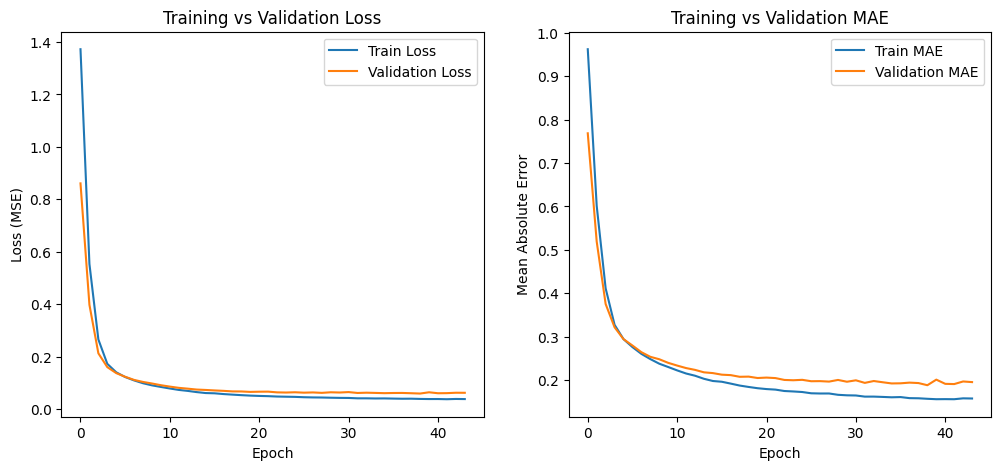

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.title("Training vs Validation MAE")
plt.show()

- Testing the Model

In [15]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R^2 Score: 0.9217
